# **Welkom bij mijn cluster analyse**

# **Bibliotheken Importeren**

In deze stap importeer ik alle benodigde bibliotheken die gebruikt zullen worden tijdens de analyse.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import homogeneity_completeness_v_measure
import time
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import homogeneity_completeness_v_measure

# **Dataset laden**

Ik heb de dataset ingeladen met behulp van pandas en deze in een tabel gezet (DataFrame), zodat ik er makkelijk naar kan kijken en ermee kan werken.

In [ ]:
df = pd.read_csv('beschrijvende_analyse_schoongemaakte_data.csv')

df.head()

,title,title_length,views,likes_to_views,likes,comment_count,comment_to_views,duration_seconds,days_since_published,published_Year,published_Month,published_Day,gecodeerde_categorie,gecodeerde_tags
0,Stories from a home for terminally ill childre...,60,77455,0.022826,1768,49,0.000633,919,2769,2017,3,24,14,229
1,Why our screens make us less happy | Adam Alter,47,800326,0.025713,20579,572,0.000715,570,2639,2017,8,1,7,327
2,A tribute to nurses | Carolyn Jones,35,87635,0.021418,1877,48,0.000548,649,2702,2017,5,30,7,337
3,"Asking for help is a strength, not a weakness ...",67,190840,0.024764,4726,187,0.000980,716,2750,2017,4,12,7,338
4,Don't feel sorry for refugees -- believe in th...,62,98523,0.027090,2669,226,0.002294,854,2646,2017,7,25,14,339


Ik maak een nieuwe DataFrame met alleen de kolommen die ik ga gebruiken voor de clustering.

In [ ]:
new_df = df[["views",	"likes",	"duration_seconds", "published_Year",	"published_Month", "published_Day",	"gecodeerde_categorie",
             "gecodeerde_tags", "title_length", "likes_to_views", "comment_to_views", "days_since_published"]]

new_df.head()

,views,likes,duration_seconds,published_Year,published_Month,published_Day,gecodeerde_categorie,gecodeerde_tags,title_length,likes_to_views,comment_to_views,days_since_published
0,77455,1768,919,2017,3,24,14,229,60,0.022826,0.000633,2769
1,800326,20579,570,2017,8,1,7,327,47,0.025713,0.000715,2639
2,87635,1877,649,2017,5,30,7,337,35,0.021418,0.000548,2702
3,190840,4726,716,2017,4,12,7,338,67,0.024764,0.000980,2750
4,98523,2669,854,2017,7,25,14,339,62,0.027090,0.002294,2646


# **Clusters maken en valideren**

Voordat ik de clustering kan uitvoeren, schaal ik de data zodat alle variabelen op dezelfde schaal staan. Dit is belangrijk voor het algoritme, zodat geen enkele variabele te veel invloed heeft vanwege een grotere waarde.

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new_df)

df_scaled = pd.DataFrame(df_scaled, columns=new_df.columns)

joblib.dump(scaler, 'scaler.joblib')

df_scaled.head()

,views,likes,duration_seconds,published_Year,published_Month,published_Day,gecodeerde_categorie,gecodeerde_tags,title_length,likes_to_views,comment_to_views,days_since_published
0,-0.270986,-0.205004,0.141273,1.333566,-1.004565,1.018761,1.037411,-0.369456,0.492300,0.982179,-0.615545,-1.251698
1,-0.071232,-0.012080,-0.628943,1.333566,0.537691,-1.587695,-1.067066,0.208593,-0.438479,1.336594,-0.567045,-1.360131
2,-0.268173,-0.203886,-0.454596,1.333566,-0.387662,1.698706,-1.067066,0.267577,-1.297660,0.809365,-0.665708,-1.307583
3,-0.239654,-0.174667,-0.306732,1.333566,-0.696114,-0.341129,-1.067066,0.273476,0.993489,1.220088,-0.410367,-1.267546
4,-0.265164,-0.195764,-0.002177,1.333566,0.229240,1.132085,1.037411,0.279374,0.635497,1.505612,0.366022,-1.354293


Ik verwijder eerst eventuele ontbrekende waarden en maak vervolgens de clusters met behulp van KMeans. Dit verdeelt de data in twee clusters: populair en niet populair.

In [ ]:
df_scaled.dropna(inplace=True)

Nu maak ik de clusters met behulp van KMeans, waarbij ik de data in twee groepen verdeel: populair en niet populair.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
df_scaled['Popularity'] = kmeans.fit_predict(df_scaled)

joblib.dump(kmeans, 'kmeans_model.joblib')
df_scaled.head()

,views,likes,duration_seconds,published_Year,published_Month,published_Day,gecodeerde_categorie,gecodeerde_tags,title_length,likes_to_views,comment_to_views,days_since_published,Popularity
0,-0.270986,-0.205004,0.141273,1.333566,-1.004565,1.018761,1.037411,-0.369456,0.492300,0.982179,-0.615545,-1.251698,0
1,-0.071232,-0.012080,-0.628943,1.333566,0.537691,-1.587695,-1.067066,0.208593,-0.438479,1.336594,-0.567045,-1.360131,0
2,-0.268173,-0.203886,-0.454596,1.333566,-0.387662,1.698706,-1.067066,0.267577,-1.297660,0.809365,-0.665708,-1.307583,0
3,-0.239654,-0.174667,-0.306732,1.333566,-0.696114,-0.341129,-1.067066,0.273476,0.993489,1.220088,-0.410367,-1.267546,0
4,-0.265164,-0.195764,-0.002177,1.333566,0.229240,1.132085,1.037411,0.279374,0.635497,1.505612,0.366022,-1.354293,0


In [ ]:
df_scaled

,views,likes,duration_seconds,published_Year,published_Month,published_Day,gecodeerde_categorie,gecodeerde_tags,title_length,likes_to_views,comment_to_views,days_since_published,Popularity
0,-0.270986,-0.205004,0.141273,1.333566,-1.004565,1.018761,1.037411,-0.369456,0.492300,0.982179,-0.615545,-1.251698,0
1,-0.071232,-0.012080,-0.628943,1.333566,0.537691,-1.587695,-1.067066,0.208593,-0.438479,1.336594,-0.567045,-1.360131,0
2,-0.268173,-0.203886,-0.454596,1.333566,-0.387662,1.698706,-1.067066,0.267577,-1.297660,0.809365,-0.665708,-1.307583,0
3,-0.239654,-0.174667,-0.306732,1.333566,-0.696114,-0.341129,-1.067066,0.273476,0.993489,1.220088,-0.410367,-1.267546,0
4,-0.265164,-0.195764,-0.002177,1.333566,0.229240,1.132085,1.037411,0.279374,0.635497,1.505612,0.366022,-1.354293,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-0.269648,-0.213609,1.330804,0.415373,1.463045,-0.114481,-2.570263,0.851525,0.993489,-0.434167,-0.479586,-0.533537,0
584,-0.284475,-0.219701,0.827626,-0.502820,-0.079211,0.225492,0.736771,0.037537,-1.584054,-0.384015,0.269126,0.505753,1
585,-0.284020,-0.221199,-0.487700,1.639630,1.771497,-1.134398,1.037411,1.346995,0.921890,-1.053881,-0.911305,-1.769675,0
586,0.307450,0.141708,-1.050465,0.415373,-0.387662,-1.021074,0.736771,0.609688,-0.510078,0.191878,-0.494755,-0.373389,0


Ik print de eerste paar resultaten om te zien welke video's in welke cluster vallen.

In [ ]:
print(df_scaled[['Popularity']].head())

   Popularity
0           0
1           0
2           0
3           0
4           0


### **Silhouette Score berekenen**
Ik bereken de Silhouette Score, die aangeeft hoe goed de data in de clusters is verdeeld. Hoe hoger de score, hoe duidelijker de clusters van elkaar zijn.

In [ ]:
from sklearn.metrics import silhouette_score

# Verwijder de 'Popularity' kolom voordat je de silhouette score berekent
df_features_only = df_scaled.drop(columns=['Popularity'])

silhouette_avg = silhouette_score(df_features_only, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.18529041298985624


Hieronder geef ik aan dat 0 not popular moet zijn en 1 popular moet zijn.

In [ ]:
cluster_mapping = {0: 'Not Popular', 1: 'Popular'}
df_scaled['Popularity'] = df_scaled['Popularity'].map(cluster_mapping)

Ik print het hieronder om het te laten zien.

In [ ]:
df_scaled['Popularity'].value_counts()

,count
Popularity,
Not Popular,323
Popular,265


# **Clusters analyseren**
Met behulp van histograms en boxplots maak ik grafieken om de verdeling van de variabelen binnen de clusters te visualiseren. Zo kan ik zien of er verschillen zijn tussen de populaire en niet-populaire video's. Dit laat mij ook bepalen welke variabelen ik het beste kan gebruiken.

In [ ]:
for feature in df_scaled:
    fig = px.histogram(df_scaled, x=feature, color='Popularity', barmode='overlay',
                       title=f'Histogram of {feature} by Cluster',
                       labels={'Popularity': 'Cluster', feature: feature})
    fig.show()

In [ ]:
for feature in df_scaled:
    fig = px.box(df_scaled, x='Popularity', y=feature, title=f'Boxplot of {feature} by Cluster',
                 labels={'Popularity': 'Cluster', feature: feature})
    fig.show()

# **Welke variabelen ga ik gebruiken**

Ik heb gekozen om vier variabelen te gebruiken voor mijn analyse: likes_to_views, title_length, days_since_published, en published_Year. Deze variabelen geven samen een goed beeld van wat een video populair maakt.

### 1. Likes to Views
Waarom ik dit gebruik: Deze variabele laat zien hoeveel likes een video krijgt in verhouding tot het aantal views. Het helpt me te begrijpen hoe betrokken de kijkers zijn bij de video. Een video met een hoge likes_to_views-verhouding betekent dat mensen de video niet alleen kijken, maar ook leuk vinden, wat vaak een teken is van populariteit.
### 2. Title Length
Waarom ik dit gebruik: De lengte van de titel is belangrijk omdat het invloed kan hebben op hoe aantrekkelijk de video is. Korte, pakkende titels trekken vaak meer aandacht, terwijl langere titels meer informatie kunnen geven en zo mensen aantrekken die specifiek naar dat onderwerp zoeken. Title_length helpt me te zien of de lengte van de titel invloed heeft op de populariteit van de video.
### 3. Days Since Published
Waarom ik dit gebruik: Deze variabele geeft aan hoe lang geleden de video is gepubliceerd. Dit is belangrijk omdat video's na verloop van tijd meer views kunnen verzamelen. Sommige video's worden direct populair, terwijl anderen later pas in populariteit groeien. Days_since_published helpt me te begrijpen hoe de tijd invloed heeft op de populariteit van een video.
### 4. Published Year
Waarom ik dit gebruik: Het jaar waarin de video is gepubliceerd kan veel zeggen over de populariteit. Nieuwere video's hebben vaak meer kans om populair te worden, omdat ze beter passen bij de huidige trends of omdat platforms zoals YouTube nieuwere video's vaker aanbevelen. Published_Year geeft me inzicht in hoe de publicatiedatum invloed kan hebben op de populariteit.
### Conclusie:
Ik heb deze vier variabelen gekozen omdat ze samen een goed beeld geven van hoe populair een video kan worden. Likes_to_views laat de betrokkenheid van de kijkers zien, title_length toont hoe aantrekkelijk de titel is, days_since_published helpt me te begrijpen hoe de populariteit over tijd groeit, en published_Year geeft me inzicht in hoe trends door de jaren heen veranderen.

In [ ]:
start_time = time.time()

In [ ]:
df_scaled

,views,likes,duration_seconds,published_Year,published_Month,published_Day,gecodeerde_categorie,gecodeerde_tags,title_length,likes_to_views,comment_to_views,days_since_published,Popularity
0,-0.270986,-0.205004,0.141273,1.333566,-1.004565,1.018761,1.037411,-0.369456,0.492300,0.982179,-0.615545,-1.251698,Not Popular
1,-0.071232,-0.012080,-0.628943,1.333566,0.537691,-1.587695,-1.067066,0.208593,-0.438479,1.336594,-0.567045,-1.360131,Not Popular
2,-0.268173,-0.203886,-0.454596,1.333566,-0.387662,1.698706,-1.067066,0.267577,-1.297660,0.809365,-0.665708,-1.307583,Not Popular
3,-0.239654,-0.174667,-0.306732,1.333566,-0.696114,-0.341129,-1.067066,0.273476,0.993489,1.220088,-0.410367,-1.267546,Not Popular
4,-0.265164,-0.195764,-0.002177,1.333566,0.229240,1.132085,1.037411,0.279374,0.635497,1.505612,0.366022,-1.354293,Not Popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-0.269648,-0.213609,1.330804,0.415373,1.463045,-0.114481,-2.570263,0.851525,0.993489,-0.434167,-0.479586,-0.533537,Not Popular
584,-0.284475,-0.219701,0.827626,-0.502820,-0.079211,0.225492,0.736771,0.037537,-1.584054,-0.384015,0.269126,0.505753,Popular
585,-0.284020,-0.221199,-0.487700,1.639630,1.771497,-1.134398,1.037411,1.346995,0.921890,-1.053881,-0.911305,-1.769675,Not Popular
586,0.307450,0.141708,-1.050465,0.415373,-0.387662,-1.021074,0.736771,0.609688,-0.510078,0.191878,-0.494755,-0.373389,Not Popular


Ik sla hier de data op die ik eerder heb geclusterd.

In [ ]:
df_scaled.to_csv('new_data.csv', index=False)

Hier laad ik het weer opnieuw op met een nieuwe dataframe zodat ik niet de oude hoef te gebruiken.

In [ ]:
nieuw_df = pd.read_csv('new_data.csv')
nieuw_df.head()

,views,likes,duration_seconds,published_Year,published_Month,published_Day,gecodeerde_categorie,gecodeerde_tags,title_length,likes_to_views,comment_to_views,days_since_published,Popularity
0,-0.270986,-0.205004,0.141273,1.333566,-1.004565,1.018761,1.037411,-0.369456,0.492300,0.982179,-0.615545,-1.251698,Not Popular
1,-0.071232,-0.012080,-0.628943,1.333566,0.537691,-1.587695,-1.067066,0.208593,-0.438479,1.336594,-0.567045,-1.360131,Not Popular
2,-0.268173,-0.203886,-0.454596,1.333566,-0.387662,1.698706,-1.067066,0.267577,-1.297660,0.809365,-0.665708,-1.307583,Not Popular
3,-0.239654,-0.174667,-0.306732,1.333566,-0.696114,-0.341129,-1.067066,0.273476,0.993489,1.220088,-0.410367,-1.267546,Not Popular
4,-0.265164,-0.195764,-0.002177,1.333566,0.229240,1.132085,1.037411,0.279374,0.635497,1.505612,0.366022,-1.354293,Not Popular


Omdat de dataset geen ontbrekende waardes bevat, gaan we verder met de andere voorbereidingstappen die we wij bij de oorspronkelijke data hebben toegepast:

*   Categorische data naar nummers omzetten
*   Numerieke data met ratio schalen

# **Nieuwe clustering uitvoeren**
Nu maak ik een nieuwe clustering met alleen deze vier variabelen. Eerst schaal ik de data opnieuw en gebruik dan KMeans om de populaire en niet-populaire video's te verdelen.

In [ ]:
nieuw_df = nieuw_df[["likes_to_views", "title_length", "days_since_published", "published_Year"]]


In [ ]:
nieuw_df.head()

,likes_to_views,title_length,days_since_published,published_Year
0,0.982179,0.492300,-1.251698,1.333566
1,1.336594,-0.438479,-1.360131,1.333566
2,0.809365,-1.297660,-1.307583,1.333566
3,1.220088,0.993489,-1.267546,1.333566
4,1.505612,0.635497,-1.354293,1.333566


# **Nieuwe clustering uitvoeren**
Nu maak ik een nieuwe clustering met alleen deze vier variabelen. Eerst schaal ik de data opnieuw en gebruik dan KMeans om de populaire en niet-populaire video's te verdelen.

In [ ]:
scaler = StandardScaler()
nieuw_df_scaled = scaler.fit_transform(nieuw_df)

nieuw_df_scaled = pd.DataFrame(nieuw_df_scaled, columns=nieuw_df.columns)

joblib.dump(scaler, 'scaler.joblib')

nieuw_df_scaled.head()

,likes_to_views,title_length,days_since_published,published_Year
0,0.982179,0.492300,-1.251698,1.333566
1,1.336594,-0.438479,-1.360131,1.333566
2,0.809365,-1.297660,-1.307583,1.333566
3,1.220088,0.993489,-1.267546,1.333566
4,1.505612,0.635497,-1.354293,1.333566


In [ ]:
nieuw_df_scaled.dropna(inplace=True)


Ik voer de clustering uit en sla het model op met joblib.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
nieuw_df_scaled['popularity_score'] = kmeans.fit_predict(nieuw_df_scaled)

joblib.dump(kmeans, 'kmeans_model.joblib')
nieuw_df_scaled.head()

,likes_to_views,title_length,days_since_published,published_Year,popularity_score
0,0.982179,0.492300,-1.251698,1.333566,0
1,1.336594,-0.438479,-1.360131,1.333566,0
2,0.809365,-1.297660,-1.307583,1.333566,0
3,1.220088,0.993489,-1.267546,1.333566,0
4,1.505612,0.635497,-1.354293,1.333566,0


Ik print de eerste paar resultaten om te zien welke video's in welke cluster vallen.

In [ ]:
print(nieuw_df_scaled[['popularity_score']].head())

   popularity_score
0                 0
1                 0
2                 0
3                 0
4                 0


In [ ]:
nieuw_df_scaled

,likes_to_views,title_length,days_since_published,published_Year,popularity_score
0,0.982179,0.492300,-1.251698,1.333566,0
1,1.336594,-0.438479,-1.360131,1.333566,0
2,0.809365,-1.297660,-1.307583,1.333566,0
3,1.220088,0.993489,-1.267546,1.333566,0
4,1.505612,0.635497,-1.354293,1.333566,0
...,...,...,...,...,...
583,-0.434167,0.993489,-0.533537,0.415373,0
584,-0.384015,-1.584054,0.505753,-0.502820,1
585,-1.053881,0.921890,-1.769675,1.639630,0
586,0.191878,-0.510078,-0.373389,0.415373,0


Ik bereken de Silhouette Score, die aangeeft hoe goed de data in de clusters is verdeeld. Je ziet hieronder dat de Silhouette Score omhoog is gegaan omdat ik nu maar 4 variabelen heb gebruikt en de goeie variabelen.

In [ ]:
silhouette_avg = silhouette_score(nieuw_df_scaled, kmeans.labels_)
print(f'Silhouette Score for refined clustering: {silhouette_avg}')

Silhouette Score for refined clustering: 0.4543869079513588


In [ ]:
end_time = time.time()

Hieronder geef ik aan dat 0 Not Popular moet zijn en 1 popular.

In [ ]:
cluster_mapping = {0: 'Not Popular', 1: 'Popular'}
nieuw_df_scaled['popularity_score'] = nieuw_df_scaled['popularity_score'].map(cluster_mapping)

Hieronder laat ik het zien

In [ ]:
nieuw_df_scaled['popularity_score'].value_counts()

,count
popularity_score,
Popular,343
Not Popular,245


# **Waarom heb ik deze 4 variabelen gekozen?**
Ik visualiseer de nieuwe clustering door scatter plots te maken voor elke variabele om te zien hoe deze bijdragen aan de populariteit van een video.

In [ ]:
future = nieuw_df[["likes_to_views"]]

for features in future.columns:
    fig = px.scatter_3d(
        nieuw_df_scaled,
        x=features,
        y=features,
        z=features,
        color='popularity_score',
        labels={'popularity_score': 'Popularity'},
        hover_data={
            features: True
        },
        title=f'3D Scatter Plot for {features} with Popularity Clusters'
    )

    fig.show()

# **Likes to views conclusie**

De variabele likes_to_views laat zien hoeveel likes een video krijgt in verhouding tot het aantal views. De grafiek laat zien dat zowel populaire als niet-populaire video's een vergelijkbare verhouding kunnen hebben. Het is goed om dit variable om te hebben voor de clustering

## Waarom is er overlap?
De overlap komt doordat alleen de verhouding van likes en views niet genoeg is om te bepalen of een video populair is. Een video kan een hoge verhouding van likes ten opzichte van views hebben, maar toch niet heel veel views in totaal. Omgekeerd kan een video veel views hebben maar relatief minder likes, en toch populair zijn door het grote aantal views.

## Uitleg van de verdeling:
De meeste punten bevinden zich in dezelfde lijn, wat betekent dat veel video's een vergelijkbare likes_to_views verhouding hebben, of ze nu populair zijn of niet.
Er zijn ook enkele uitschieters met een veel hogere likes_to_views verhouding, maar deze video's zijn zeldzaam en bevinden zich in het "niet populair" cluster.
Kortom, likes_to_views is een belangrijke indicator van betrokkenheid, maar het alleen gebruiken om populariteit te voorspellen is moeilijk, omdat er veel overlap is tussen video's die wel en niet populair zijn.

In [ ]:
future = nieuw_df[["title_length"]]

for features in future.columns:
    fig = px.scatter_3d(
        nieuw_df_scaled,
        x=features,
        y=features,
        z=features,
        color='popularity_score',
        labels={'popularity_score': 'Popularity'},
        hover_data={
            features: True
        },
        title=f'3D Scatter Plot for {features} with Popularity Clusters'
    )

    fig.show()

# **Title_length Conclusie:**
De variabele title_length laat zien hoe lang de titel van een video is. In de grafiek zie je dat video's met zowel korte als lange titels in beide categorieën (populair en niet-populair) kunnen vallen. Er is veel overlap tussen de twee clusters.

## Waarom is er overlap?
De lengte van een titel alleen kan niet goed voorspellen of een video populair zal worden. Dit komt doordat video's met korte, pakkende titels populair kunnen zijn, net zoals video's met lange, beschrijvende titels. Het hangt vaak af van andere factoren, zoals de inhoud van de video en het publiek dat deze bekijkt. Hierdoor overlappen de punten in de grafiek, omdat zowel populaire als niet-populaire video's titels van verschillende lengtes kunnen hebben.

## Uitleg van de verdeling:
De meeste video's hebben een vergelijkbare verdeling van titellengtes. Dit betekent dat title_length een goede variabele is, omdat het kan laten zien hoe aantrekkelijk een titel is. Zowel lange als korte titels kunnen bijdragen aan populariteit, en deze variabele biedt waardevolle inzichten.
Kortom, de lengte van de titel is een belangrijk kenmerk, maar het kan niet op zichzelf worden gebruikt om de populariteit van een video te voorspellen, wat verklaart waarom er zoveel overlap is in de grafiek.

In [ ]:
future = nieuw_df[["days_since_published"]]

for features in future.columns:
    fig = px.scatter_3d(
        nieuw_df_scaled,
        x=features,
        y=features,
        z=features,
        color='popularity_score',
        labels={'popularity_score': 'Popularity'},
        hover_data={
            features: True
        },
        title=f'3D Scatter Plot for {features} with Popularity Clusters'
    )

    fig.show()

# **Days_since_published Conclusie**

In deze scatter plot zien we de variabele days_since_published uitgezet tegenover de populaire en niet-populaire clusters. Laten we een verkorte analyse doen en de overlap uitleggen.

## Verkorte Conclusie:
De variabele days_since_published geeft aan hoe lang het geleden is dat een video werd gepubliceerd. De plot toont hoe video's die al langer geleden zijn gepubliceerd, zowel in de populaire als niet-populaire categorieën kunnen vallen. Dit betekent dat video's, ongeacht hoe oud ze zijn, nog steeds populair kunnen worden.

## Waarom is er overlap:
De overlap tussen populaire en niet-populaire video's kan verklaard worden doordat populariteit niet alleen afhankelijk is van de tijd sinds publicatie. Sommige video's worden na lange tijd alsnog populair (bijvoorbeeld door een trend of aanbeveling), terwijl andere video's meteen na publicatie populair zijn. Het aantal dagen sinds publicatie is dus slechts één factor die een rol speelt in de populariteit van een video. Daarom is het logisch dat video's met een vergelijkbaar aantal dagen sinds publicatie in beide clusters vallen.

In [ ]:
future = nieuw_df[["published_Year"]]

for features in future.columns:
    fig = px.scatter_3d(
        nieuw_df_scaled,
        x=features,
        y=features,
        z=features,
        color='popularity_score',
        labels={'popularity_score': 'Popularity'},
        hover_data={
            features: True
        },
        title=f'3D Scatter Plot for {features} with Popularity Clusters'
    )

    fig.show()

# **Published_Year Conclusie**

In deze scatter plot zie je de variabele published_Year uitgezet tegen de populaire en niet-populaire clusters. Hier is een verkorte analyse en uitleg van de overlap in de grafiek.

## Verkorte Conclusie:
De variabele published_Year laat zien in welk jaar een video werd gepubliceerd. In de plot zien we een duidelijke scheiding tussen populaire en niet-populaire video's. Dit komt omdat video's die in latere jaren zijn gepubliceerd (meer recent) vaker als populair worden gecategoriseerd, terwijl oudere video's vaak in de niet-populaire categorie vallen.

## Waarom is er weinig overlap:
In tegenstelling tot eerdere grafieken is er hier minder overlap tussen de populaire en niet-populaire video's. Dit komt omdat de populariteit van video's vaak meer afhankelijk is van recente trends. Recente video's hebben meer kans om populair te zijn, omdat ze vaak beter aansluiten bij de huidige interesses van het publiek en mogelijk worden ondersteund door verbeterde algoritmen op platforms zoals YouTube.

## Waarom sommige oudere video's nog populair kunnen zijn:
Hoewel de meeste video's die verder terug in de tijd zijn gepubliceerd als "niet populair" worden gemarkeerd, kunnen sommige oudere video's nog steeds populair zijn. Dit gebeurt meestal met video's die blijvende relevantie hebben of op een later moment herontdekt worden door nieuwe trends of aanbevelingen.

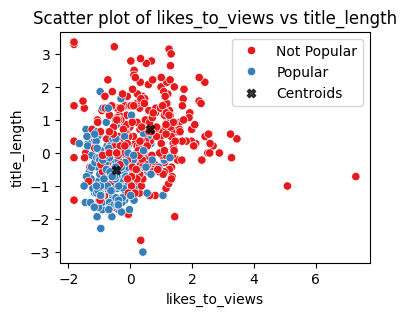

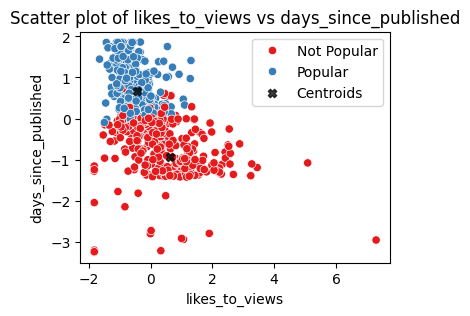

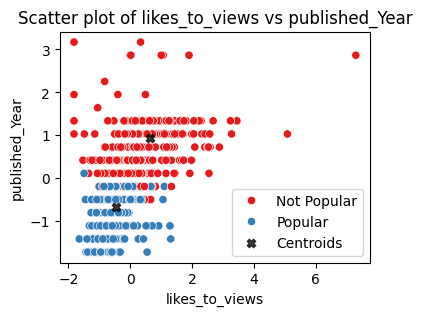

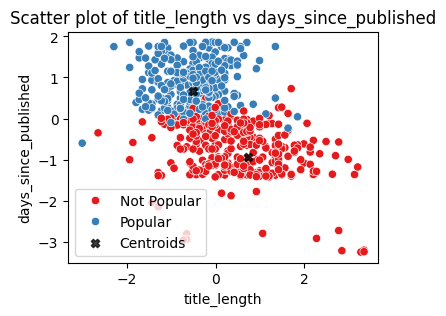

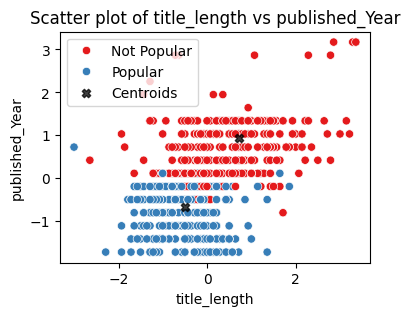

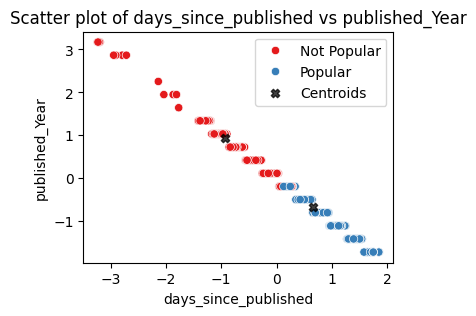

In [ ]:
features = ["likes_to_views", "title_length", "days_since_published", "published_Year"]
combinaties = list(itertools.combinations(features, 2))

# Scatter plot voor elke combinatie van features
for feature_x, feature_y in combinaties:
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=df_scaled[feature_x], y=df_scaled[feature_y], hue=df_scaled['Popularity'], palette="Set1")

    # Centroids markeren
    plt.scatter(kmeans.cluster_centers_[:, features.index(feature_x)],
                kmeans.cluster_centers_[:, features.index(feature_y)],
                c='black', alpha=0.75, marker='X', label="Centroids")

    # Plot details instellen
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.title(f"Scatter plot of {feature_x} vs {feature_y}")
    plt.show()

# **Benchmarking**

In [ ]:
latency = end_time - start_time
print(f"Latency: {latency} seconds")

Latency: 0.7537710666656494 seconds


In [ ]:
latency_seconds = end_time - start_time
num_rows = len(nieuw_df_scaled)
latency_milliseconds = latency_seconds * 1000  # converteer naar milliseconden
throughput_ms_per_item = latency_milliseconds / num_rows
print(f"Latency: {latency_milliseconds:.2f} milliseconds")
print(f"Throughput: {throughput_ms_per_item:.2f} milliseconds per item")

Latency: 753.77 milliseconds
Throughput: 1.28 milliseconds per item


# **Data Opslaan**
Ten slotte print ik de eerste paar rijen om te kijken of de data klopt en sla ik uiteindelijk mijn schoongemaakte data en de nieuwe clusters op in een CSV-bestand.

In [ ]:
nieuw_df_scaled.head()

,likes_to_views,title_length,days_since_published,published_Year,popularity_score
0,0.982179,0.492300,-1.251698,1.333566,Not Popular
1,1.336594,-0.438479,-1.360131,1.333566,Not Popular
2,0.809365,-1.297660,-1.307583,1.333566,Not Popular
3,1.220088,0.993489,-1.267546,1.333566,Not Popular
4,1.505612,0.635497,-1.354293,1.333566,Not Popular


In [ ]:
nieuw_df_scaled.to_csv('Cluster_analyse_Rami.csv', index=False)